# liner regression algorothm

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
customer_churn=pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
c_5=customer_churn.iloc[:,4]

In [5]:
c_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [6]:
(customer_churn['gender']=='Male')&(customer_churn['SeniorCitizen']==1)&(customer_churn['PaymentMethod']=='Electronic check')

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [7]:
c_random=customer_churn[(customer_churn['gender']=='Male')&(customer_churn['SeniorCitizen']==1)&(customer_churn['PaymentMethod']=='Electronic check')]

In [8]:
c_random

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [9]:
customer_churn[(customer_churn['tenure']>70)|(customer_churn['MonthlyCharges']>100)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [10]:
c_333=customer_churn.sample(n=333)

In [11]:
c_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5213,7668-XCFYV,Female,1,Yes,No,17,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.55,1614.7,No
4077,0916-QOFDP,Female,1,Yes,Yes,14,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.80,1346.3,No
5225,5376-PCKNB,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.45,7459,No
3637,4083-EUGRJ,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,178.5,Yes
6760,5295-PCJOO,Male,0,No,Yes,4,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.40,184.4,Yes


In [12]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

data visulization

Text(0.5, 1.0, 'Distibribution of internet services')

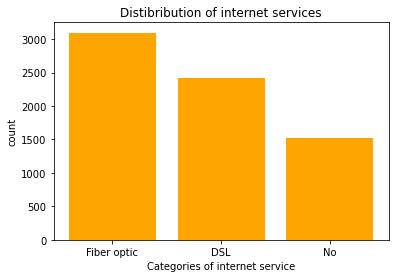

In [13]:
plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(),customer_churn['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel("Categories of internet service")
plt.ylabel("count")
plt.title("Distibribution of internet services")

(array([624., 238., 376., 133., 241., 123., 235.,  99., 117., 185.,  99.,
        167.,  97., 144.,  63., 175.,  94.,  79., 151.,  57., 144.,  65.,
        133.,  65.,  88., 115.,  59., 120.,  70., 130.,  51., 135.,  68.,
         64., 134.,  68., 150.,  68., 144.,  65., 127.,  76.,  76., 142.,
         80., 165.,  98., 195., 119., 532.]),
 array([ 0.  ,  1.44,  2.88,  4.32,  5.76,  7.2 ,  8.64, 10.08, 11.52,
        12.96, 14.4 , 15.84, 17.28, 18.72, 20.16, 21.6 , 23.04, 24.48,
        25.92, 27.36, 28.8 , 30.24, 31.68, 33.12, 34.56, 36.  , 37.44,
        38.88, 40.32, 41.76, 43.2 , 44.64, 46.08, 47.52, 48.96, 50.4 ,
        51.84, 53.28, 54.72, 56.16, 57.6 , 59.04, 60.48, 61.92, 63.36,
        64.8 , 66.24, 67.68, 69.12, 70.56, 72.  ]),
 <BarContainer object of 50 artists>)

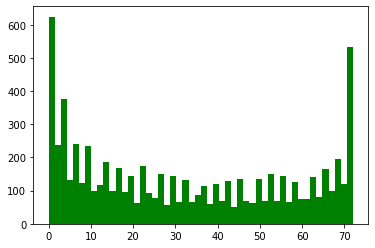

In [14]:
plt.hist(customer_churn['tenure'],bins=50,color='green')

Text(0.5, 1.0, 'montly charges vs tenure')

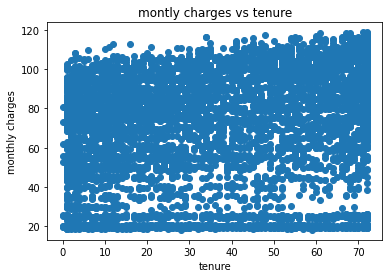

In [15]:
plt.scatter(x=customer_churn['tenure'],y=customer_churn['MonthlyCharges'])
plt.xlabel('tenure')
plt.ylabel('monthly charges')
plt.title('montly charges vs tenure')

<AxesSubplot:title={'center':'tenure'}, xlabel='[Contract]'>

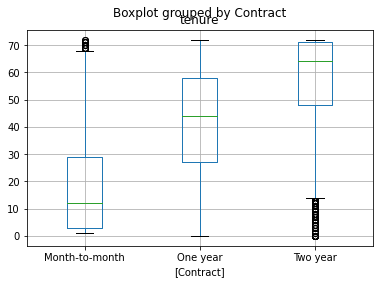

In [16]:
customer_churn.boxplot(column=['tenure'],by=['Contract'])

# linear regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y=customer_churn[['MonthlyCharges']]
x=customer_churn[['tenure']]

In [18]:
y.head(),x.head()

(   MonthlyCharges
 0           29.85
 1           56.95
 2           53.85
 3           42.30
 4           70.70,
    tenure
 0       1
 1      34
 2       2
 3      45
 4       2)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [20]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=regressor.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

29.394584027273893

# logistic regression

In [29]:
x=customer_churn[['MonthlyCharges','tenure']]
y=customer_churn[['Churn']]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

c:\users\darshan malaviya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [32]:
y_pred=log_model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [34]:
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[1634,  181],
        [ 364,  287]], dtype=int64),
 0.7789943227899432)

# Decision tree

In [35]:
x=customer_churn[['tenure']]
y=customer_churn[['Churn']]

from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [36]:
my_tree=DecisionTreeClassifier()
my_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=my_tree.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [40]:
confusion_matrix(y_test,y_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.7466288147622427

# random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

<ipython-input-42-9f640a334052>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [43]:
y_pred=rf.predict(x_test)

In [44]:
confusion_matrix(y_test,y_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred)

0.7466288147622427